# Combine habitat datasets
This notebook works through an approach to combine OSPAR Habitats 2022 dataset and EMODnet Seabed Habitats dataset.

## Setup

In [5]:
import os

In [52]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [4]:
import geopandas as gpd

In [14]:
import contextily as cx

In [6]:
DATA_DIR = '../data/'

## Load habitat data

### OSPAR Habitats 2022

In [37]:
ospar_shp = os.path.join(DATA_DIR, 'OSPARHabitats2022_Points/OSPAR2022Points.shp')

In [38]:
ospar_gdf = gpd.read_file(ospar_shp)

In [39]:
ospar_gdf.head()

,GUI,RecordKey,HabType,HabSubType,HabStatus,Certainty,Determiner,DetDate,SurveyKey,StartDate,...,DateType,PlaceName,DataOwner,Accuracy,Latitude,Longitude,AltHabType,AltHabClas,AltHabRel,geometry
0,OSPARHab2010IE2v1,11000112,Lophelia pertusa reefs,Not Applicable,Present,Uncertain,Max Wisshak & Andr‚ Freiwald / IPAL Erlangen,2006-01-01,IE_surv001,None,...,U,Rockall Trough,None,100,55.5350,-15.6667,None,None,None,POINT (-15.6667 55.535)
1,OSPARHab2010IE2v1,11000117,Lophelia pertusa reefs,Not Applicable,Present,Uncertain,Max Wisshak & Andr‚ Freiwald / IPAL Erlangen,2006-01-01,IE_surv001,None,...,U,Rockall Bank,None,1000,56.0333,-15.4000,None,None,None,POINT (-15.4 56.0333)
2,OSPARHab2010IE2v1,11000118,Lophelia pertusa reefs,Not Applicable,Present,Uncertain,Max Wisshak & Andr‚ Freiwald / IPAL Erlangen,2006-01-01,IE_surv001,None,...,U,Rockall Bank,None,1000,56.1667,-15.6500,None,None,None,POINT (-15.65 56.1667)
3,OSPARHab2010IE2v1,11000119,Lophelia pertusa reefs,Not Applicable,Present,Uncertain,Max Wisshak & Andr‚ Freiwald / IPAL Erlangen,2006-01-01,IE_surv001,None,...,U,Rockall Bank,None,1000,56.1667,-15.3000,None,None,None,POINT (-15.3 56.1667)
4,OSPARHab2010IE2v1,11000120,Lophelia pertusa reefs,Not Applicable,Present,Uncertain,Max Wisshak & Andr‚ Freiwald / IPAL Erlangen,2006-01-01,IE_surv001,None,...,U,Rockall Bank,None,1000,56.1667,-15.1500,None,None,None,POINT (-15.15 56.1667)


In [54]:
ospar_gdf.HabType.unique()

array(['Lophelia pertusa reefs', 'Zostera beds', 'Intertidal mudflats',
       'Sea-pen and burrowing megafauna communities',
       'Modiolus modiolus horse mussel beds', 'Maerl beds',
       'Ostrea edulis beds', 'Deep-sea sponge aggregations',
       'Carbonate mounds', 'Coral gardens', 'Kelp forests',
       'Intertidal Mytilus edulis beds on mixed and sandy sediments',
       'Seamounts', 'Oceanic ridges with hydrothermal vents/fields',
       'Sabellaria spinulosa reefs', 'Littoral chalk communities'],
      dtype=object)

### EMODnet Seabed Habitats

In [41]:
emod_shp = os.path.join(DATA_DIR, 'EMODnet_Seabed_Habitats/habitat_point_all.shp')

In [42]:
emod_gdf = gpd.read_file(emod_shp)

In [49]:
emod_gdf.head()

,FID,objectid,measuremen,eventid,datasetid,shorttitle,expectedci,restrictio,contactpoi,eventdate,...,seabedty_1,seabedstat,samplingme,sampling_1,seabedty_2,seabedty_3,sourcehabi,relationsh,comments,geometry
0,habitat_point.17242211,17242211,UKMR:MRSNH01500000002:MRSNH01500000009.10:MRSN...,UKMR:MRSNH01500000002:MRSNH01500000009.10,UKMR:MRSNH01500000002,2008 SNH SCM survey of reef and sea caves habi...,"Harries, Moore, Lyndon, Mair (2009) The establ...",UK Open Government License V3,"[{""Role"" : ""Custodian"", ""Organisation"" : ""Scot...",2008/08/04 00:00:00.000,...,http://vocab.nerc.ac.uk/collection/M21/current...,None,Video - drop video,http://vocab.ices.dk/services/rdf/collection/S...,16/02/2009,Expert judgement,None,None,SUBSTRATE: Large and very large boulders on be...,POINT (-1.18141 60.00723)
1,habitat_point.17242212,17242212,UKMR:MRSNH01500000002:MRSNH01500000009.39:MRSN...,UKMR:MRSNH01500000002:MRSNH01500000009.39,UKMR:MRSNH01500000002,2008 SNH SCM survey of reef and sea caves habi...,"Harries, Moore, Lyndon, Mair (2009) The establ...",UK Open Government License V3,"[{""Role"" : ""Custodian"", ""Organisation"" : ""Scot...",2008/08/04 00:00:00.000,...,http://vocab.nerc.ac.uk/collection/M21/current...,None,Video - drop video,http://vocab.ices.dk/services/rdf/collection/S...,16/02/2009,Expert judgement,None,None,"SUBSTRATE: Plain of small boulders, cobbles an...",POINT (-1.15147 59.99632)
2,habitat_point.17242213,17242213,UKMR:MRSNH01500000002:MRSNH01500000009.39:MRSN...,UKMR:MRSNH01500000002:MRSNH01500000009.39,UKMR:MRSNH01500000002,2008 SNH SCM survey of reef and sea caves habi...,"Harries, Moore, Lyndon, Mair (2009) The establ...",UK Open Government License V3,"[{""Role"" : ""Custodian"", ""Organisation"" : ""Scot...",2008/08/04 00:00:00.000,...,http://vocab.nerc.ac.uk/collection/M21/current...,None,Video - drop video,http://vocab.ices.dk/services/rdf/collection/S...,16/02/2009,Expert judgement,None,None,"SUBSTRATE: Plain of small boulders, cobbles an...",POINT (-1.15147 59.99632)
3,habitat_point.17242214,17242214,UKMR:MRSNH01500000002:MRSNH0150000000A.20:MRSN...,UKMR:MRSNH01500000002:MRSNH0150000000A.20,UKMR:MRSNH01500000002,2008 SNH SCM survey of reef and sea caves habi...,"Harries, Moore, Lyndon, Mair (2009) The establ...",UK Open Government License V3,"[{""Role"" : ""Custodian"", ""Organisation"" : ""Scot...",2008/08/04 00:00:00.000,...,http://vocab.nerc.ac.uk/collection/M21/current...,None,Video - drop video,http://vocab.ices.dk/services/rdf/collection/S...,17/02/2009,Expert judgement,None,None,SUBSTRATE: Bedrock and boulders. BIOTA: Rock d...,POINT (-1.15719 59.99075)
4,habitat_point.17242215,17242215,UKMR:MRSNH01500000002:MRSNH0150000000A.22:MRSN...,UKMR:MRSNH01500000002:MRSNH0150000000A.22,UKMR:MRSNH01500000002,2008 SNH SCM survey of reef and sea caves habi...,"Harries, Moore, Lyndon, Mair (2009) The establ...",UK Open Government License V3,"[{""Role"" : ""Custodian"", ""Organisation"" : ""Scot...",2008/08/04 00:00:00.000,...,http://vocab.nerc.ac.uk/collection/M21/current...,None,Video - drop video,http://vocab.ices.dk/services/rdf/collection/S...,17/02/2009,Expert judgement,None,None,SUBSTRATE: Rugged bedrock with very small pock...,POINT (-1.16051 59.99007)


In [50]:
emod_gdf.columns

Index(['FID', 'objectid', 'measuremen', 'eventid', 'datasetid', 'shorttitle',
       'expectedci', 'restrictio', 'contactpoi', 'eventdate', 'eventendda',
       'mindepth', 'maxdepth', 'seabedclas', 'seabedcl_1', 'seabedtype',
       'seabedty_1', 'seabedstat', 'samplingme', 'sampling_1', 'seabedty_2',
       'seabedty_3', 'sourcehabi', 'relationsh', 'comments', 'geometry'],
      dtype='object')

In [57]:
list(emod_gdf.seabedtype.unique())

['IR.HIR.KSed.LsacSac - Laminaria saccharina and/or Saccorhiza polyschides on exposed infralittoral rock',
 'CR.MCR.EcCr.FaAlCr.Bri - Brittlestars on faunal and algal encrusted exposed to moderately wave-exposed circalittoral rock',
 'CR.MCR.EcCr.FaAlCr.Adig - Alcyonium digitatum, Pomatoceros triqueter, algal and bryozoan crusts on wave-exposed circalittoral rock',
 'IR.HIR.KSed - Sediment-affected or disturbed kelp and seaweed communities',
 'IR.MIR.KR.Lhyp.GzFt - Grazed Laminaria hyperborea forest with coralline crusts on upper infralittoral rock',
 'IR.FIR.SG.CC.BalPom - Balanus crenatus and/or Pomatoceros triqueter with spirorbid worms and coralline crusts on severely scoured vertical infralittoral rock',
 'SS.SMx.CMx - Circalittoral mixed sediment',
 'CR.LCR.BrAs.AmenCio - Solitary ascidians, including Ascidia mentula and Ciona intestinalis, on wave-sheltered circalittoral rock',
 'SS.SMp.Mrl - Maerl beds',
 'SS.SMu.CSaMu - Circalittoral sandy mud',
 'CR.MCR.EcCr.FaAlCr.Car - Cary

## Plot data

Text(0.5, 1.0, 'OSPAR Habitats 2022')

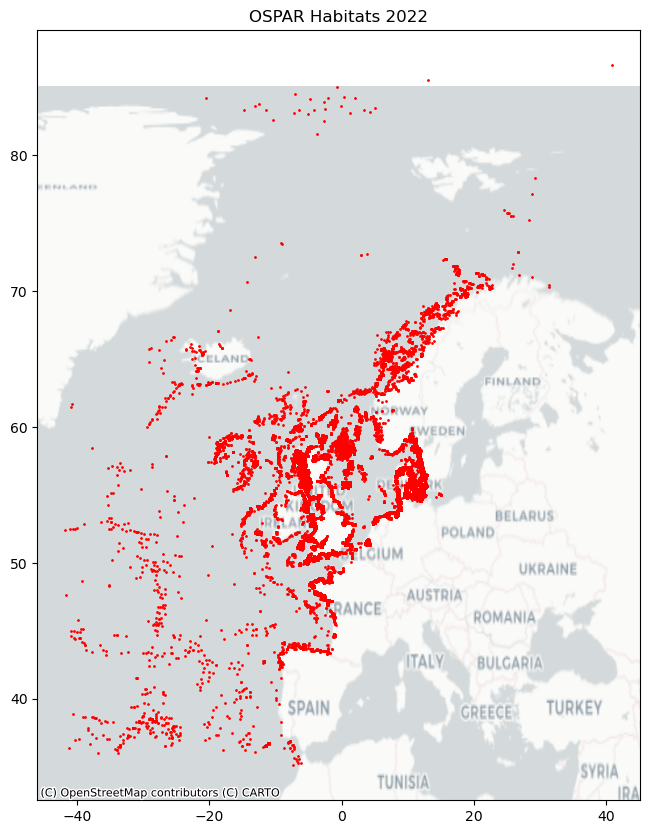

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ospar_gdf.plot(ax=ax, marker='o', color='red', markersize=1)
cx.add_basemap(ax, crs=ospar_gdf.crs, source=cx.providers.CartoDB.Positron)
ax.set_title('OSPAR Habitats 2022')

Text(0.5, 1.0, 'EMODnet Seabed Habitats')

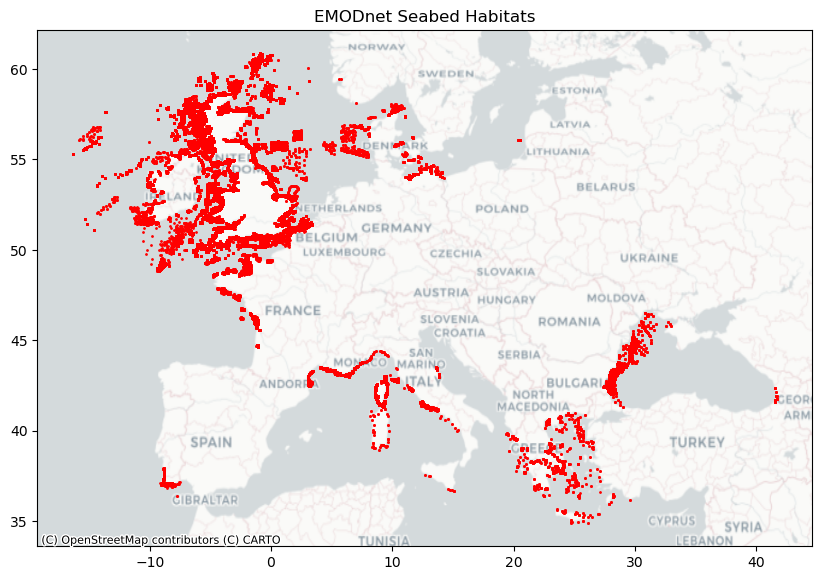

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
emod_gdf.plot(ax=ax, marker='o', color='red', markersize=1)
cx.add_basemap(ax, crs=emod_gdf.crs, source=cx.providers.CartoDB.Positron)
ax.set_title('EMODnet Seabed Habitats')